In [94]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
import sklearn 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Training Set**

In [95]:
df = pd.read_csv('../input/summeranalytics2020/train.csv')

In [96]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [97]:
df.dtypes

Id                          int64
Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [98]:
#One hot encoding

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

In [99]:
df['BusinessTravel'] = labelencoder.fit_transform(df['BusinessTravel'])
df['Department'] = labelencoder.fit_transform(df['Department'])
df['EducationField'] = labelencoder.fit_transform(df['EducationField'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['JobRole'] = labelencoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = labelencoder.fit_transform(df['OverTime'])

In [100]:
df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,0,1,2,3,3,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,2,1,12,4,1,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,2,2,2,1,3,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,2,1,24,1,1,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,2,1,3,3,4,689,3,...,3,1,10,2,10,7,7,8,1,1



However there is a masssive imbalance in our dataset

In [101]:
(df['Attrition'].value_counts()/1470)*100

0    57.346939
1    53.401361
Name: Attrition, dtype: float64

EDA

In [102]:
data_n=df[['Age','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']]


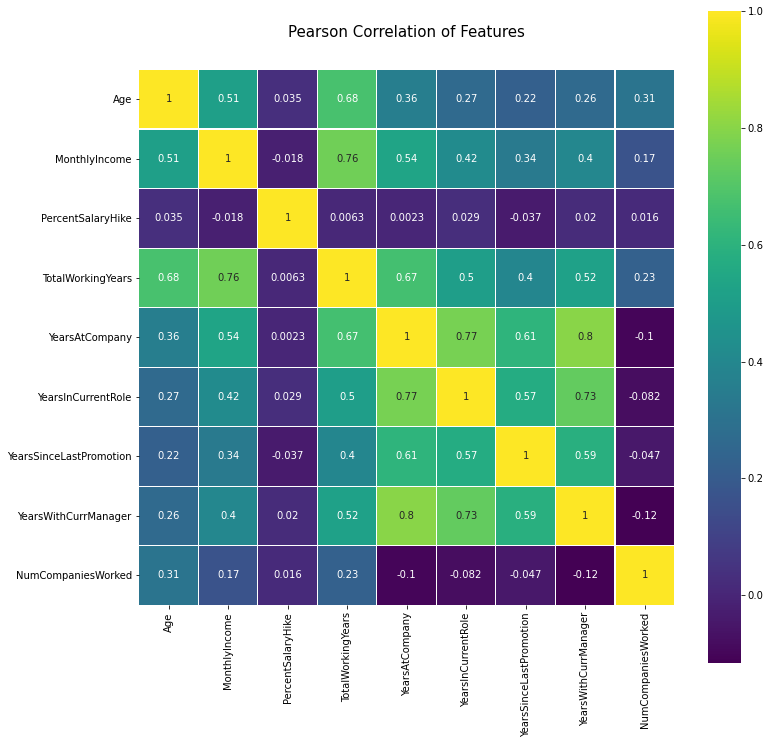

In [103]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_n.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [104]:
y=df['Attrition']
x=df.drop(df.columns[1], axis = 1)

In [105]:
r_state=52
avg_scores = []
parameter_values = np.arange(0,1, 0.01)
for mid in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state
                                            , min_impurity_decrease = mid
                                            )
    scores = cross_val_score(estimator, x, y, scoring='accuracy', cv = 10)
    avg_scores.append(np.mean(scores))

In [106]:
mid_opt = np.argmax(avg_scores)
print("The optimal value of 'min_impurity_decrease' is {0:.2f}".format(parameter_values[mid_opt])+
      " giving accuracy {0:.2f}".format(avg_scores[mid_opt]))



The optimal value of 'min_impurity_decrease' is 0.00 giving accuracy 1.00


In [107]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state
                                       , min_impurity_decrease = 0.007
                                       )
model=estimator.fit(x,y)
y_pred = estimator.predict(x)
accuracy_full = np.mean(y == y_pred) * 100
print("The accuracy on full training set is {0:.1f}%".format(accuracy_full))

The accuracy on full training set is 100.0%


In [108]:
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [109]:
# Feature Extraction with RFE

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: "+str(fit.n_features_))
print("Selected Features: "+str(fit.support_))
print("Feature Ranking: "+str(fit.ranking_))

Num Features: 3
Selected Features: [False  True False False False False False False False False False False
 False  True False False  True False False False False False False False
 False False False False]
Feature Ranking: [24  1 15 22 21 18 10 25  4 12  2 11  3  1 26 13  1 23 19  5 14  8 17  7
  9 16  6 20]


28
['attrition', 'behaviour', 'businesstravel', 'communicationskill', 'department', 'distancefromhome', 'education', 'educationfield', 'employeenumber', 'environmentsatisfaction', 'gender', 'id', 'jobinvolvement', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'numcompaniesworked', 'overtime', 'percentsalaryhike', 'performancerating', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']


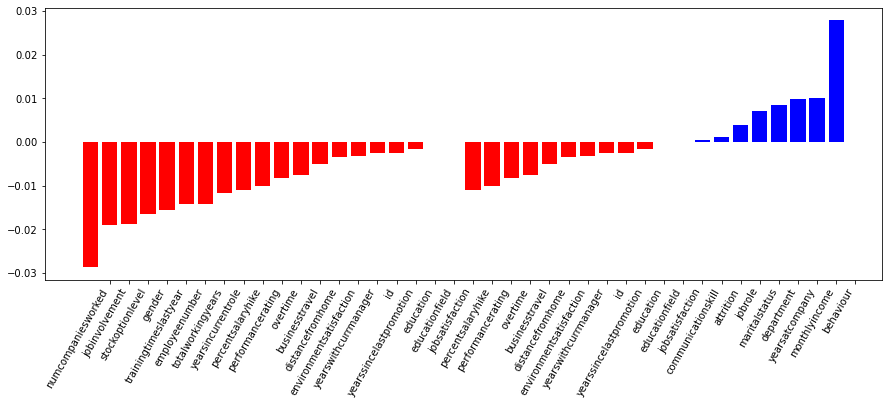

In [171]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
cv = CountVectorizer()
cv.fit(x)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
svm = LinearSVC()
svm.fit(x, y)
plot_coefficients(svm, cv.get_feature_names())

train and Split

In [172]:
#start_time = time.time()

train, test = sklearn.model_selection.train_test_split(df, train_size = 0.75,random_state=r_state)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

xgd_train=xgb.DMatrix(data=x_train,label=y_train)
xgd_test=xgb.DMatrix(data=x_test,label=y_test)


For Main Data Set : 1628
For Train Set : 1221
For Test Set : 407


In [173]:
params = {"objective":"binary:logistic", "max_depth":4,"nthread":5,"learning_rate":0.1,
         "subsample":0.2,"colsample_bytree":0.3,"n_estimators":20,"seed":52}

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(params=params)

In [174]:
# Fit the classifier to the training set
xg_cl.fit(x_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(x_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

[09:25:41] WARNING: /workspace/src/learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 1.000000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       197

    accuracy                           1.00       407
   macro avg       1.00      1.00      1.00       407
weighted avg       1.00      1.00      1.00       407

1.0
Duration: --- 0.00026845137278238933 Minutes ---
ROC AUC: 1.00


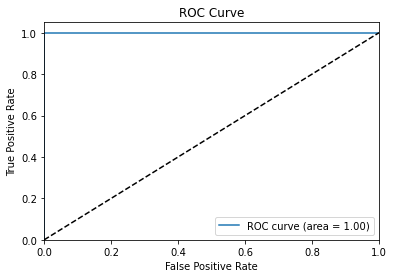

Kappa score is :1.0


In [175]:
import time
start_time = time.time()
model=xg_cl
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
#print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))

**Smote data**

In [176]:
y_train.value_counts()

0    633
1    588
Name: Attrition, dtype: int64

In [177]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=r_state,k_neighbors=9)
x_train_smote,y_train_smote =sm.fit_sample(x_train,y_train)

In [178]:
y_train_smote.value_counts()

1    633
0    633
Name: Attrition, dtype: int64

[09:25:45] WARNING: /workspace/src/learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 1.000000
True         0    1
Predicted          
0          210    0
1            0  197
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       197

    accuracy                           1.00       407
   macro avg       1.00      1.00      1.00       407
weighted avg       1.00      1.00      1.00       407

1.0
Duration: --- 0.06983362038930258 Minutes ---
ROC AUC: 1.00


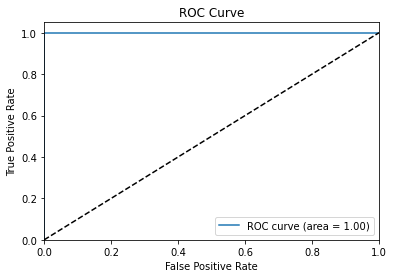

Kappa score is :1.0


In [179]:
params = {"objective":"binary:logistic", "max_depth":4,"nthread":5,"learning_rate":0.1,
         "subsample":0.2,"colsample_bytree":0.3,"n_estimators":20,"seed":52}

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(params=params)

# Fit the classifier to the training set
xg_cl.fit(x_train_smote, y_train_smote)

# Predict the labels of the test set: preds
preds = xg_cl.predict(x_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

model=xg_cl
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))

> Test set

In [180]:
accuracy

1.0

In [181]:
y_train_smote

0       1
1       1
2       0
3       1
4       0
       ..
1261    1
1262    1
1263    1
1264    1
1265    1
Name: Attrition, Length: 1266, dtype: int64